In [1]:
import rasterio
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

IMG_PATH = "NFREC_Quincy_DSSAT_10_2_2024_Altum_20m.tif"
SAVE_PATH = "temp.png"
COLOR_MAP = plt.get_cmap("RdYlGn")


In [2]:
with rasterio.open(IMG_PATH) as dataset:
    dataset_crs = dataset.crs
    blue = dataset.read(1)
    green = dataset.read(2)
    red = dataset.read(3)
    re = dataset.read(4)
    nir = dataset.read(5)


In [3]:
def GNDVI(nir: np.ndarray, green: np.ndarray) -> np.ndarray:
    return ((nir - green) / (nir + green))

In [4]:
def generate_image(x: np.ndarray, cm: plt.Colormap) -> Image:
    image = cm(x)
    return Image.fromarray((image[:, :, :3] * 255).astype(np.uint8))


In [5]:
img = generate_image(GNDVI(nir, green), COLOR_MAP)

C:\Users\casez\AppData\Local\Temp\ipykernel_31220\3852368504.py:2: RuntimeWarning: invalid value encountered in divide
  return ((nir - green) / (nir + green))


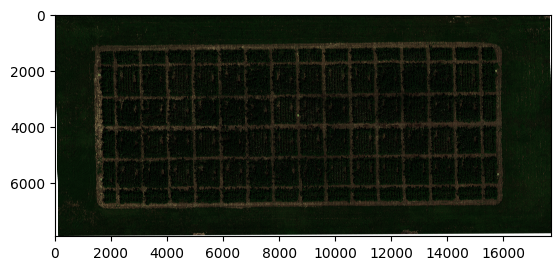

In [6]:
rgb_raster = np.vstack(([(red/32768).T], [(green/32768).T], [(blue/32768).T])).T
rgb_img = Image.fromarray((rgb_raster* 255).astype(np.uint8))
plt.imshow(np.asarray(rgb_img))

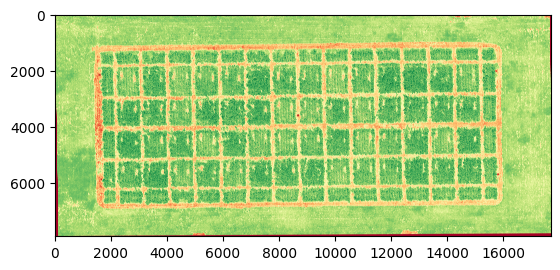

In [7]:
plt.imshow(np.asarray(img))

In [8]:
img.save(SAVE_PATH)